# **Predicting End Semester Performance through Simple Linear Regression**

This notebook implements an example of predicting end semester performance from the midsemester performance and classroom attendance.

The purpose of this notebook is to explain the concepts underlying Simple Linear Regression (SLR) through an example that connects to the student's daily academic life. 

This programming exercise can also be undertaken a lab activity for simple linear regression.

I explained the necessary statistical concept and working of SLR in my video course on Machine Learning. The unit on Simple Linear Regression covers following points.

1.  [Simple Linear Regression (SLR): 7 Key points to remember.](https://youtu.be/--awGDpi9pk)
2.  [SLR: Statistical Background](https://youtu.be/o1QWm6yLHdw)
3.  [SLR: Estimating Model Parameters](https://youtu.be/h-WyE73E1yM)
4.  [SLR: Evaluating Model Parameters](https://youtu.be/AvZ-4yFGwG4)


The notebook uses the data set of student's performance, and attendance recorded that I collected while teaching a course on Software Architecture in the year 2014. 

Here, I am  building two different models. First is to explore relationship between MSE and ESE. Second is to explore the relationship between classroom attendance and ESE.

**(1) Initilization**

This section imports modules such as Pandas, Numpy,  Matplotlib, Seaborn necessary to process the data. In addition to this, Statmodels and Math module is implemented.  

The simple linear regression model is going to be implemented through Ordinary Least Square (OLS) method hence statmodels and Math module are imported.

The dataset is available in CSV format.  The header of the dataset confirms that all the feature variables are numeric.

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('../input/predictingese/AttendanceMarksSA.csv')
df.head()
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


**(2) Correlation Analysis**

Before building an SLR model, the correlation analysis is performed by generating a correlation matrix and the scatter plot. It checks the existence of linearity between input variables(MSE, Attendance) and output variables (ESE).

In [18]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,ESE
Attendance,1.000000,-0.080943,-0.109972
MSE,-0.080943,1.000000,0.751530
ESE,-0.109972,0.751530,1.000000


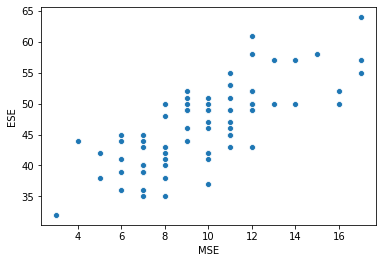

In [19]:
X = df["MSE"]
y = df["ESE"]

sns.scatterplot(X ,y)


**(3) Pre-Processing**

The input vectors (exog) and output vectors (endog) are separated from the data frame. Also, a constant unit vector is added in the input features.

In [20]:
endog = df['ESE']
exog = sm.add_constant(df[['MSE']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


**(4) Model building:** The OLS method from the Statmodels is used to build the Simple Regression Model. This method realizes the Ordinary Least Square algorithm. The summary of the results is also printed.

In [21]:
# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())



                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.85e-14
Time:                        04:39:12   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

> 

The following code segment implements a function named RSE to calculate the Residual Standard Error from the given predicted and actual values.

In [22]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [23]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.396224549647786


**Intepreting the results of first model:**

(1) The values of t-statistics for y-intercept and slope are very high. Also, the p-values for these parameters are < 0.05. These observations validate the accuracy of y-intercept and slope. Hence, the results are statistically significant.

(2) The value R2 is **0.56**. Though it is not as high as required to indicate a strong linear relationship, it shows the existence of linearity between MSE marks and ESE marks.

(3) The value of calculated RSE is **4.3.** on training data set. An error of +/- 4 is an acceptable error in predicting the performance of ESE. [](http://)

The second model aims to explore the relationship between classroom attendance and End Semester performance. First, it visualizes the correlation between classroom attendance and end semester performance. 

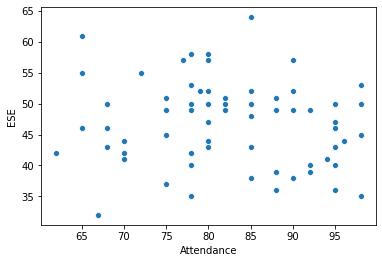

In [24]:
X1 = df["Attendance"]
y1 = df["ESE"]

sns.scatterplot(X1 ,y1)


The input vectors are separated, and a constant unit vector is added as an input.

In [25]:
endog1 = df['ESE']
exog1 = sm.add_constant(df[['Attendance']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


In [26]:
# Fit and summarize OLS model
mod1 = sm.OLS(endog1, exog1)
results1 = mod1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Mon, 21 Sep 2020   Prob (F-statistic):              0.354
Time:                        04:39:12   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0

**Interpreting the results of the Second model:**

The R2 value is **0.012**, which indicates a very weak or non-existence of a linear relationship between classroom attendance and end semester performance.  This implies that students might be physically attending classes without any mindful academic engagement.   Also, the absolute value of t-statistic for slope is below one which is tiny to indicate a linear relationship. Further, the p-value for slope is > 0.05, showing no statistically significant relationship between attendance and ESE marks. 

Hence, in the context of this dataset, attendance is a bad predictor for end semester performance. 